In [1]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import innvestigate

Using TensorFlow backend.


Rank: 1, Label: Persian_cat, Score: 0.451
Rank: 2, Label: Siamese_cat, Score: 0.314
Rank: 3, Label: lynx, Score: 0.069
Rank: 4, Label: tabby, Score: 0.041
Rank: 5, Label: computer_keyboard, Score: 0.015


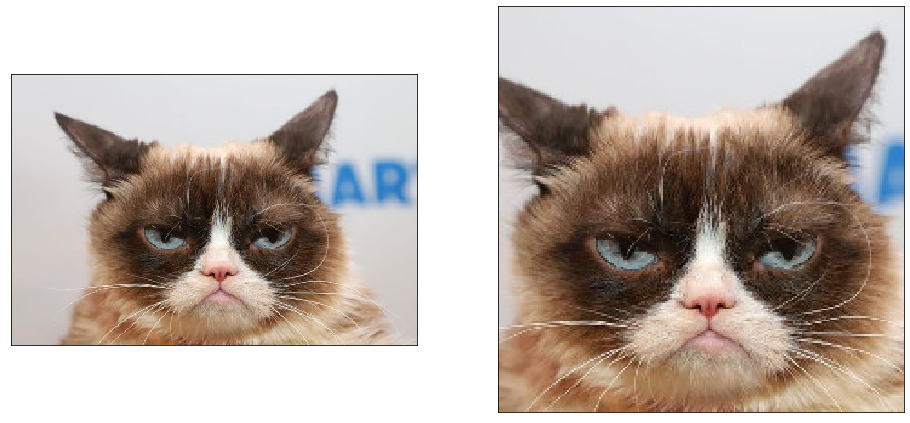

In [2]:
model = VGG16()

def center_crop(img, new_width=224, new_height=224):
    width = img.shape[1]
    height = img.shape[0]
    
    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))
    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))
    
    if any(np.array([left, right, top, bottom]) < 0):
        raise Exception("Cropped image has to be exactly of size 224x224. Your input image is too small.")

    return img[top:bottom, left:right]

img = load_img('cat.jpg')
imgarr = img_to_array(img)
imgarr = center_crop(imgarr)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.imshow(imgarr.astype(np.uint8))

imgarr_preproc = np.expand_dims(imgarr.copy(), axis=0)
imgarr_preproc = preprocess_input(imgarr_preproc)

pred = model.predict(imgarr_preproc)
labels = decode_predictions(pred, top=5)

for i, label in enumerate(labels[0]):
    print("Rank: {:}, Label: {:}, Score: {:.3f}".format(i + 1, label[1], label[2]))

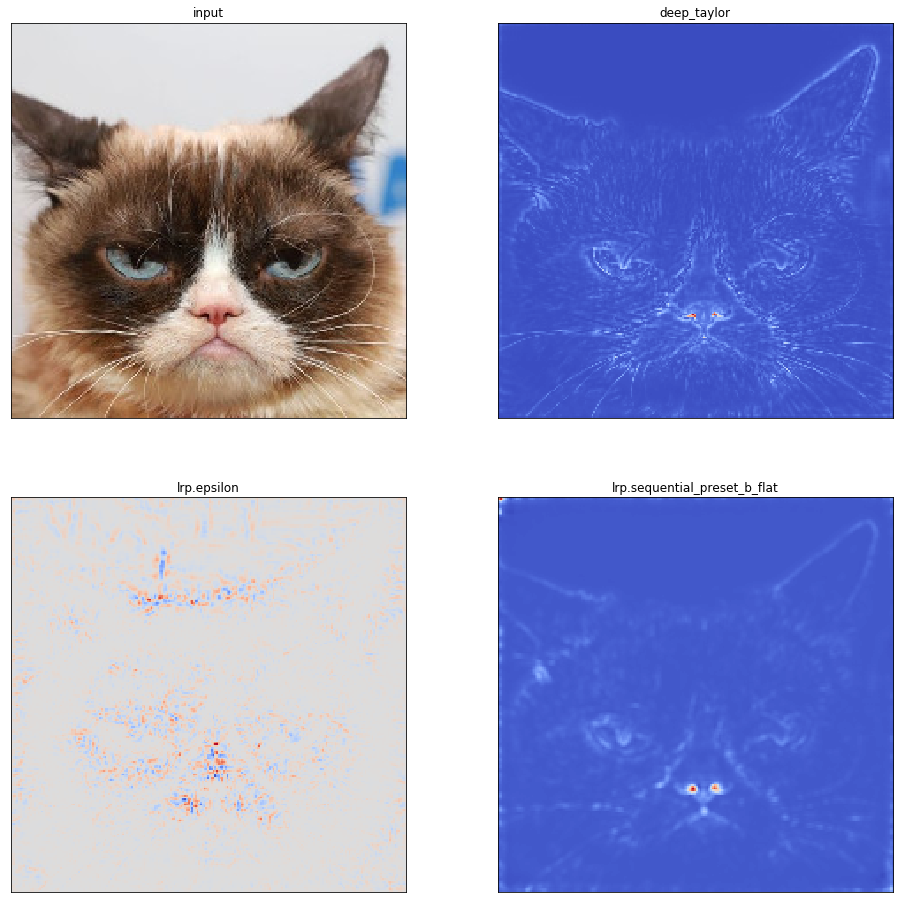

In [3]:
model2 = innvestigate.utils.model_wo_softmax(model)
analyzers = {}
for method in ["deep_taylor", "lrp.epsilon", "lrp.sequential_preset_b_flat"]:
    analyzers[method] = innvestigate.create_analyzer(method, model2)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("input")
plt.imshow(imgarr.astype(np.uint8))

for i, method in enumerate(analyzers):
    a = analyzers[method].analyze(imgarr_preproc)
    a = np.mean(a, axis=-1).squeeze()
    a = (a - a.max()) / (a.max() - a.min())
    plt.subplot(2, 2, i + 2)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.title(method)
    plt.imshow(a, cmap="coolwarm")

Rank: 1, Label: Siamese_cat, Score: 0.987
Rank: 2, Label: lynx, Score: 0.003
Rank: 3, Label: Persian_cat, Score: 0.003
Rank: 4, Label: tabby, Score: 0.002
Rank: 5, Label: Egyptian_cat, Score: 0.001


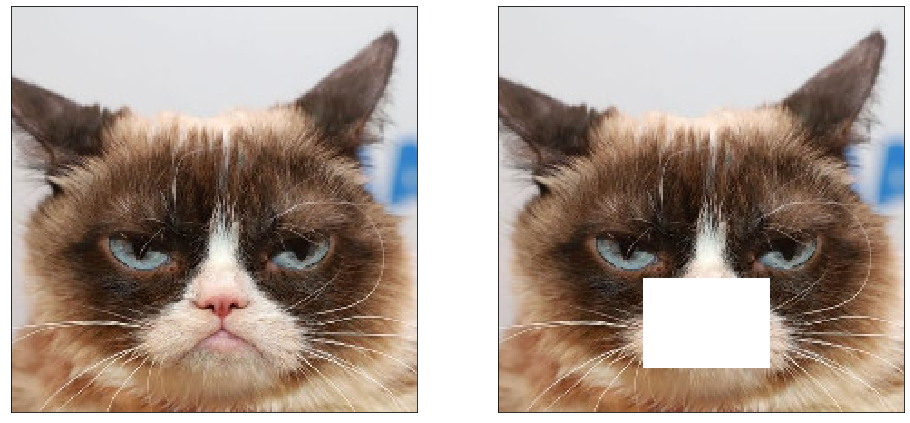

In [4]:
imgarr2 = imgarr.copy()
imgarr2[150:200, 80:150, :] = 255

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.imshow(imgarr.astype(np.uint8))
plt.subplot(1, 2, 2)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.imshow(imgarr2.astype(np.uint8));

imgarr2_preproc = np.expand_dims(imgarr2.copy(), axis=0)
imgarr2_preproc = preprocess_input(imgarr2_preproc)

pred2 = model.predict(imgarr2_preproc)
labels = decode_predictions(pred2, top=5)

for i, label in enumerate(labels[0]):
    print("Rank: {:}, Label: {:}, Score: {:.3f}".format(i + 1, label[1], label[2]))